# Importing Libraries

In [1]:
# Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

file_paths = []

for dirname, _, filenames in os.walk('C:/Users/NAVEENA/Downloads/archive'):
    for filename in filenames:
        file_paths.append(os.path.join(dirname, filename))

print(f"Total files found: {len(file_paths)}")
print("First 10 files:")
print(file_paths[:10])

Total files found: 49988
First 10 files:
['C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10048.jpg', 'C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10052.jpg', 'C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10057.jpg', 'C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10064.jpg', 'C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10074.jpg', 'C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10086.jpg', 'C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10091.jpg', 'C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10105.jpg', 'C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10109.jpg', 'C:/Users/NAVEENA/Downloads/archive\\dogs_vs_cats\\test\\cats\\cat.10110.jpg']


# Reading and Exploring the data

In [2]:
TRAIN_DIR_PATH = 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train'
file_names = os.listdir(TRAIN_DIR_PATH)

print("Contents of the training directory:")
for name in file_names:
    print(name)

Contents of the training directory:
cats
dogs


In [3]:
cats_path = os.path.join(TRAIN_DIR_PATH, 'cats')
dogs_path = os.path.join(TRAIN_DIR_PATH, 'dogs')

num_cats = len(os.listdir(cats_path))
num_dogs = len(os.listdir(dogs_path))

print(f'Total cats images: {num_cats}')
print(f'Total dogs images: {num_dogs}')
print(f'Total training images: {num_cats + num_dogs}')

Total cats images: 10000
Total dogs images: 10000
Total training images: 20000


In [4]:
TEST_DIR_PATH = 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/test'
file_names = os.listdir(TEST_DIR_PATH)

print("Contents of the training directory:")
for name in file_names:
    print(name)

Contents of the training directory:
cats
dogs


In [5]:
cats_test_path = os.path.join(TEST_DIR_PATH, 'cats')
dogs_test_path = os.path.join(TEST_DIR_PATH, 'dogs')

num_cats_test = len(os.listdir(cats_test_path))
num_dogs_test = len(os.listdir(dogs_test_path))

print(f'Total test cats images: {num_cats_test}')
print(f'Total test dogs images: {num_dogs_test}')
print(f'Total test images: {num_cats_test + num_dogs_test}')

Total test cats images: 2488
Total test dogs images: 2500
Total test images: 4988


In [6]:
IMAGE_FOLDER_PATH = "C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)

In [7]:
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

for file_name in FILE_NAMES:
    target = file_name.split(".")[0]
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    
    if(target == "dogs"):
        train_dogs_dir.append(full_path)
    if(target == "cats"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame()
dataset['image_path'] = full_paths 
dataset['target'] = targets

In [8]:
cats_dir = 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/cats'
dogs_dir = 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/dogs'

In [9]:
train_cats_dir = [os.path.join(cats_dir, file) for file in os.listdir(cats_dir) if file.endswith(".jpg")]
train_dogs_dir = [os.path.join(dogs_dir, file) for file in os.listdir(dogs_dir) if file.endswith(".jpg")]

In [10]:
print("Sample cats image paths:", train_cats_dir[:5])
print("Sample dogs image paths:", train_dogs_dir[:5])

Sample cats image paths: ['C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/cats\\cat.0.jpg', 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/cats\\cat.1.jpg', 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/cats\\cat.100.jpg', 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/cats\\cat.1000.jpg', 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/cats\\cat.10002.jpg']
Sample dogs image paths: ['C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/dogs\\dog.0.jpg', 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/dogs\\dog.1.jpg', 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/dogs\\dog.10.jpg', 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/dogs\\dog.1000.jpg', 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train/dogs\\dog.10000.jpg']


In [11]:
full_paths = train_cats_dir + train_dogs_dir
targets = [0] * len(train_cats_dir) + [1] * len(train_dogs_dir)  # 0 = cat, 1 = dog

dataset = pd.DataFrame({
    'image_path': full_paths,
    'label': targets
})

print("Total images loaded:", len(dataset))
print(dataset.head())

Total images loaded: 20000
                                          image_path  label
0  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
1  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
2  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
3  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
4  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0


In [12]:
data = []
labels = []
IMG_SIZE = 64

In [13]:
for i in range(len(dataset)):
    if i % 1000 == 0:
        print(f"Processing image {i} of {len(dataset)}")

    img_path = dataset['image_path'][i]
    label = dataset['label'][i]

    img = cv2.imread(img_path)
    if img is None:
        continue  # Skip if image not found or corrupted

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0

    data.append(img)
    labels.append(label)

Processing image 0 of 20000
Processing image 1000 of 20000
Processing image 2000 of 20000
Processing image 3000 of 20000
Processing image 4000 of 20000
Processing image 5000 of 20000
Processing image 6000 of 20000
Processing image 7000 of 20000
Processing image 8000 of 20000
Processing image 9000 of 20000
Processing image 10000 of 20000
Processing image 11000 of 20000
Processing image 12000 of 20000
Processing image 13000 of 20000
Processing image 14000 of 20000
Processing image 15000 of 20000
Processing image 16000 of 20000
Processing image 17000 of 20000
Processing image 18000 of 20000
Processing image 19000 of 20000


In [14]:
X = np.array(data)
y = np.array(labels)

In [15]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20000, 64, 64, 3)
Shape of y: (20000,)


In [16]:
print(dataset.head())

                                          image_path  label
0  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
1  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
2  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
3  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
4  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0


In [17]:
print(len(dataset))

20000


In [18]:
print(dataset.columns)

Index(['image_path', 'label'], dtype='object')


In [19]:
print("Total data count:", dataset['label'].count())

counts = dataset['label'].value_counts()
print("\nClass distribution:")
print(counts)

Total data count: 20000

Class distribution:
label
0    10000
1    10000
Name: count, dtype: int64


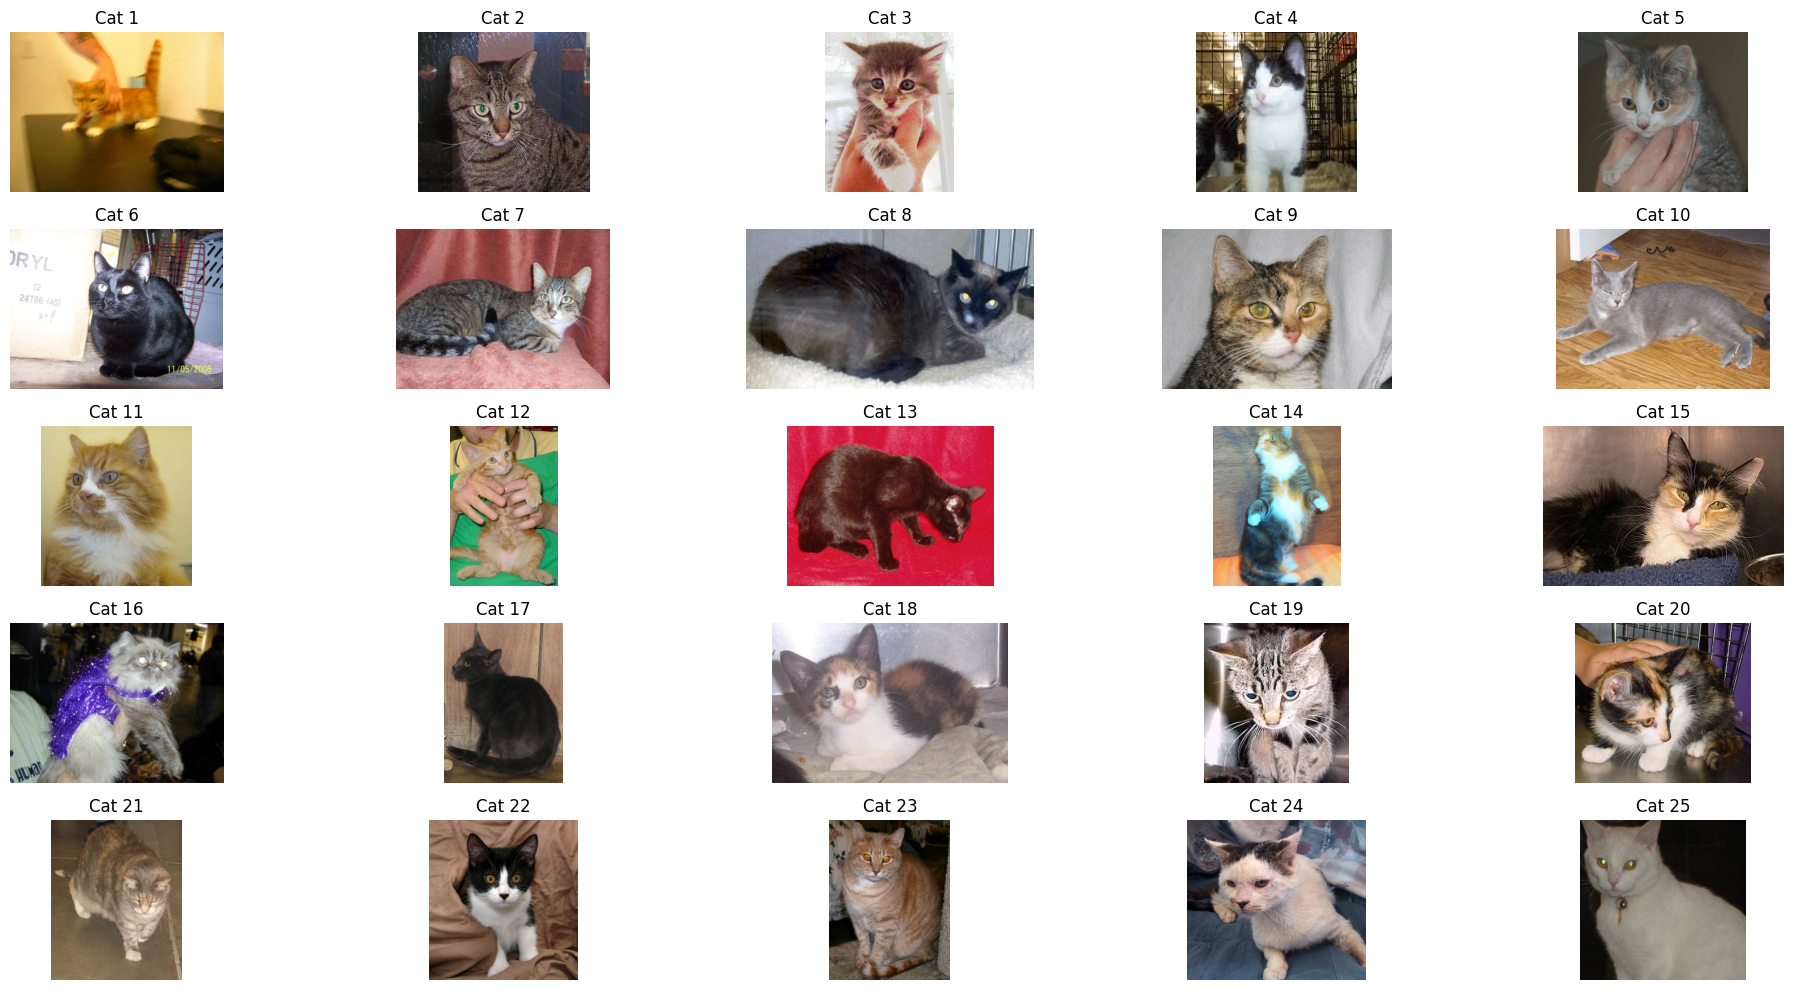

In [20]:
rows = 5
cols = 5
fig = plt.figure(figsize=(20, 10))

for i in range(rows * cols):
    img = mpimg.imread(train_cats_dir[i])  # Read the image
    ax = fig.add_subplot(rows, cols, i + 1)  # Create subplot
    ax.imshow(img)  # Show image on that subplot
    ax.axis('off')  # Hide axes for a cleaner look
    ax.set_title(f"Cat {i+1}")

fig.tight_layout()
plt.show()

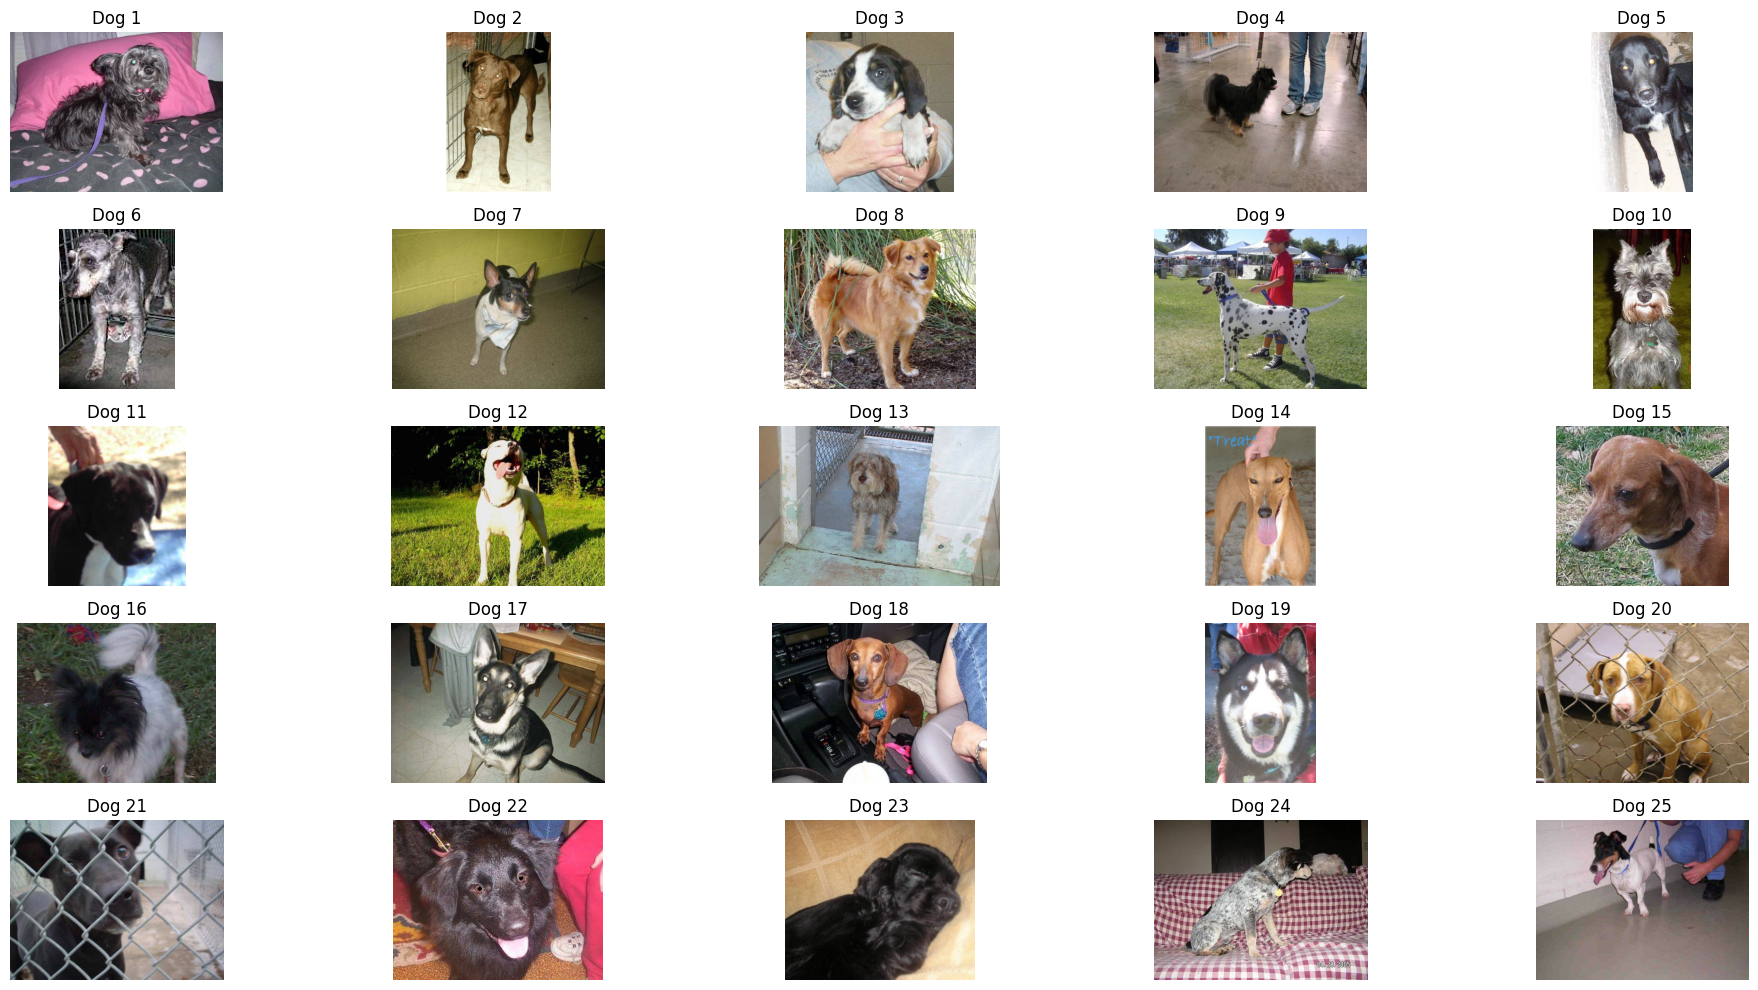

In [21]:
rows = 5
cols = 5
fig = plt.figure(figsize=(20, 10))

for i in range(rows * cols):
    img = mpimg.imread(train_dogs_dir[i])  # Read the image
    ax = fig.add_subplot(rows, cols, i + 1)  # Create subplot
    ax.imshow(img)  # Plot image on the axis
    ax.axis('off')  # Hide axes
    ax.set_title(f"Dog {i+1}")

fig.tight_layout()
plt.show()

In [22]:
print(dataset.columns)

Index(['image_path', 'label'], dtype='object')


In [23]:
train, test_val = train_test_split(dataset, test_size=0.2, stratify=dataset['label'], random_state=20)

In [24]:
test, val = train_test_split(test_val, test_size=0.5, stratify=test_val['label'], random_state=20)

In [25]:
print("Train class distribution:\n", train['label'].value_counts())
print("\nValidation class distribution:\n", val['label'].value_counts())
print("\nTest class distribution:\n", test['label'].value_counts())

Train class distribution:
 label
1    8000
0    8000
Name: count, dtype: int64

Validation class distribution:
 label
0    1000
1    1000
Name: count, dtype: int64

Test class distribution:
 label
1    1000
0    1000
Name: count, dtype: int64


In [26]:
train.shape, test_val.shape

((16000, 2), (4000, 2))

In [27]:
print(dataset.head())

                                          image_path  label
0  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
1  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
2  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
3  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
4  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0


In [28]:
target_distribution = test['label'].value_counts()
print(target_distribution.head(10))

label
1    1000
0    1000
Name: count, dtype: int64


In [29]:
print(test.columns)

Index(['image_path', 'label'], dtype='object')


In [30]:
target_distribution.index = target_distribution.index.map({0: 'Cat', 1: 'Dog'})
print(target_distribution)

label
Dog    1000
Cat    1000
Name: count, dtype: int64


In [31]:
print(os.listdir())

[' PRODIGY.ipynb', ' PRODIGY_ML_04.ipynb', '.ipynb_checkpoints', '3d_clusters.html', 'best_model.h5', 'best_model.keras', 'house_prices_prediction.csv', 'logs', 'Mall_Customers.csv', 'PRODIGY_ML_01.ipynb', 'PRODIGY_ML_02.ipynb', 'PRODIGY_ML_03 .ipynb', 'temp-plot.html', 'test.csv', 'train.csv', 'training_log.csv', 'Untitled1.ipynb']


In [32]:
TEST_DIR = 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/test'
test_images = [os.path.join(TEST_DIR, i) for i in os.listdir(TEST_DIR)]

In [33]:
print(test_images[:5])

['C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/test\\cats', 'C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/test\\dogs']


In [34]:
print(dataset)

                                              image_path  label
0      C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
1      C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
2      C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
3      C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
4      C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      0
...                                                  ...    ...
19995  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      1
19996  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      1
19997  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      1
19998  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      1
19999  C:/Users/NAVEENA/Downloads/archive/dogs_vs_cat...      1

[20000 rows x 2 columns]


# Train and Evaluation

In [35]:
data_dir = "C:/Users/NAVEENA/Downloads/archive/dogs_vs_cats/train"

In [36]:
data = []
for file in os.listdir(data_dir):
    if file.endswith(".jpg"):
        label = 1 if 'dog' in file.lower() else 0  # 1 = dog, 0 = cat
        data.append([os.path.join(data_dir, file), label])

dataset = pd.DataFrame(data, columns=['image_path', 'label'])

In [37]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None  
    img = cv2.resize(img, (100, 100))
    img = img.flatten()
    return img

In [38]:
X = np.array(X)
y = np.array(y)

print("Shape of X:", X.shape)      # (num_images, 64*64*3)
print("Length of y:", len(y))      # Should match X.shape[0]
print("First label:", y[0])

Shape of X: (20000, 64, 64, 3)
Length of y: 20000
First label: 0


In [39]:
X_flat = X.reshape(X.shape[0], -1)

pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_flat)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_train, y_train)

SVC()

In [40]:
y_pred = clf.predict(X_test)

print("\n---------------------------------- Model Evaluation ----------------------------------\n")
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


---------------------------------- Model Evaluation ----------------------------------


 Accuracy: 0.66075

 Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.66      2019
           1       0.66      0.65      0.66      1981

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.66      0.66      0.66      4000


 Confusion Matrix:
 [[1346  673]
 [ 684 1297]]
